#### Importing Required Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import textblob
import re
import autocorrect
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , LancasterStemmer , SnowballStemmer , WordNetLemmatizer
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\restaurant_reviews.csv")
df

,Review
0,An exceptional dining experience! The flavors ...
1,The menu is a symphony of flavors that take yo...
2,"From appetizers to desserts, the balance of fl..."
3,"The ambiance is charming, and the food is noth..."
4,This restaurant is a hidden gem! The dishes ar...
5,A feast for the senses! The flavors were bold ...
6,The fusion of different cuisines is done seaml...
7,This restaurant not only serves delectable dis...
8,"As a vegan, I'm thrilled to have found a resta..."
9,The cozy atmosphere of this restaurant adds to...


#### Text Data Preprocessing

In [3]:
def eda(data):
    count = 0 
    count = data.apply(lambda x: count + emoji.emoji_count(x)).sum()
    lower = data.str.islower().sum()
    url = data.apply(lambda x: True if re.search(r'https?:\S+| www.\S+',x) else False).sum()
    tags = data.apply(lambda x: True if re.search(r'<[^>]+>',x) else False).sum()
    punctuation = data.apply(lambda x: True if re.search(r'[^a-zA-Z0-9]',x) else False).sum()
    digits = data.apply(lambda x: True if re.search(r'[0-9]',x) else False).sum()

    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'Tags':tags,'Punctuation':punctuation,'Digits':digits})

In [4]:
eda(df.Review)

Emoji           0
Lower_case      0
Urls            0
Tags            0
Punctuation    20
Digits          0
dtype: int64

In [5]:
def text_pre(x):
    spell = autocorrect.Speller()    #Object for spelling correction
    lan = LancasterStemmer()
    snow = SnowballStemmer('english')
    lem = WordNetLemmatizer()
    x = x.lower()   #COnverting entire text into lowercase
    spell.autocorrect_sentence(x)   #Spelling Correction
    x = re.sub(r'[^a-zA-Z0-9]' ,' ', x)   #REmoving Punctuation marks
    x = word_tokenize(x)               #Tokenize in words
    x = [i for i in x if i not in stopwords.words("english")]       #Removing Stopwords
    x = [lan.stem(i) for i in x]
    x = [lem.lemmatize(i) for i in x]
    return x

In [6]:
df["Review"] = df["Review"].apply(text_pre)
df["Review"]

0     [exceiv, din, expery, flav, dant, pal, dish, m...
1     [menu, symphony, flav, tak, tast, bud, delight...
2     [appet, dessert, bal, flav, impecc, chef, expe...
3     [amby, charm, food, noth, short, extraordin, i...
4     [resta, hid, gem, dish, prep, precid, car, sta...
5     [feast, sen, flav, bold, distinct, mak, dish, ...
6     [fus, diff, cuisin, don, seamless, refresh, ta...
7     [resta, serv, delect, dish, also, cat, famy, a...
8     [veg, thrilled, found, resta, off, diver, flav...
9     [cozy, atmosph, resta, ad, charm, delicy, dish...
10    [brunch, menu, delight, assort, sweet, sav, op...
11    [sav, room, dessert, sweet, off, heav, decad, ...
12    [staff, at, knowledg, enh, overal, din, expery...
13    [fan, auth, flav, plac, chef, commit, preserv,...
14    [resta, rom, dim, light, cozy, booth, delect, ...
15    [kudo, resta, commit, sustain, u, loc, sourc, ...
16    [menu, journey, exot, flav, dish, tel, story, ...
17    [resta, lat, night, menu, savy, crav, gour

In [9]:
df["Review"] = [" ".join(i[0::]) for i in df["Review"]]
df["Review"]

0     exceiv din expery flav dant pal dish masterpie...
1     menu symphony flav tak tast bud delight journe...
2     appet dessert bal flav impecc chef expert shin...
3     amby charm food noth short extraordin innov me...
4     resta hid gem dish prep precid car staff frien...
5     feast sen flav bold distinct mak dish work art...
6     fus diff cuisin don seamless refresh tak tradi...
7     resta serv delect dish also cat famy amby welc...
8     veg thrilled found resta off diver flav veg me...
9     cozy atmosph resta ad charm delicy dish warm d...
10    brunch menu delight assort sweet sav opt dish ...
11    sav room dessert sweet off heav decad cak inno...
12    staff at knowledg enh overal din expery friend...
13    fan auth flav plac chef commit preserv tradit ...
14    resta rom dim light cozy booth delect dish mak...
15    kudo resta commit sustain u loc sourc ingredy ...
16    menu journey exot flav dish tel story chef abl...
17    resta lat night menu savy crav gourmet exp

#### Bag of Words(BOW) vectorization

In [10]:
count = CountVectorizer()
numeric = count.fit_transform(df['Review']).toarray()
pd.DataFrame(numeric, columns = count.get_feature_names_out())

,abl,ad,adv,also,amby,anyon,apart,appet,apprecy,art,...,vary,veg,visit,wait,warm,welcom,wholesom,win,work,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
text = ' '.join(df['Review'])
text

'exceiv din expery flav dant pal dish masterpiec at detail pres tast commend must visit food enthusiast menu symphony flav tak tast bud delight journey every dish thought craft fus ingredy pur geni left happy heart satisfy stomach appet dessert bal flav impecc chef expert shin every bit atmosph ad overal enjoy fantast plac apprecy fin din amby charm food noth short extraordin innov menu off vary opt bet last wait return sav delight dish resta hid gem dish prep precid car staff friend knowledg menu stumbl upon culin treas recommend enough feast sen flav bold distinct mak dish work art serv top notch atmosph elev entir din expery tru gem world gastronom fus diff cuisin don seamless refresh tak tradit dish result simply divin resta success cre un culin id set apart resta serv delect dish also cat famy amby welcom kid friend opt menu mak gre cho famy night win win par childr veg thrilled found resta off diver flav veg menu cre plant ba dish impress veg delight anyon look expl plant ba opt 

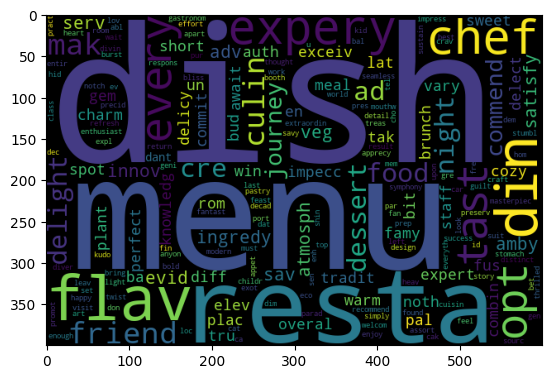

In [12]:
data = WordCloud(width = 600, height = 400).generate(text)
plt.imshow(data)

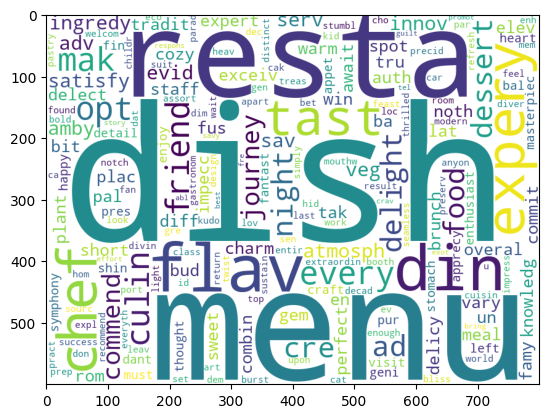

In [16]:
data = WordCloud(background_color='white',width = 800, height = 600).generate(text)
plt.imshow(data)